In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
#from PIL import Image

In [2]:
tf.random.set_seed(40)

In [3]:
folder_path = "C:/Users/Bryan/USC/DSCI 552/final project"
# folder_path = "/content/drive/Shareddrives/552 Final Project/Landmarks-v1_1"
# folder_path = "/Users/jerawincel/Documents/USC/DSCI552/552FinalProject/Landmarks-v1_1"



In [4]:
# Define landscape categories
categories = ["Gothic", "Modern", "Mughal", "Neoclassical", "Pagodas", "Pyramids"]

In [5]:
landmarks = []
images = []
# labels by landmark names
targets = []
# labels by category names
y_cat = []
i = 0
n_cat = 0

for category in categories:
    subdir_path = os.path.join(folder_path, category)
    #print(subdir_path)
    
    # Iterate through each subfolder in the parent folder
    
    for landmark in os.listdir(subdir_path):
        if (landmark == '.DS_Store'):
          continue
        else:
          landmarks.append(landmark)
          
      # Construct the full path to the subfolder
          next_path = os.path.join(subdir_path, landmark)
          
          # Iterate through each image file in the subfolder
          for filename in os.listdir(next_path):
              # Construct the full path to the image file
              image_path = os.path.join(next_path, filename)
              try: 
                # Read the image using OpenCV
                image = cv2.imread(image_path)
                if image is None:
                  continue
                else:
                  #image = cv2.resize(image, (224, 224))

                  # Convert the image to an array and normalize the pixel values
                  #img_array = np.array(image) #/ 255.0
                  images.append(image)
                  targets.append(i)
                  y_cat.append(n_cat)
                  #break
              except Exception as e:
                    print(f"Error processing file {image_path}: {e}")
        i += 1
    n_cat += 1


            

In [6]:
targets = np.array(targets)
print(targets)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8 10 10 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15
 15 16 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 19 19 19 19 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 21 21 21 21 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 24 24 24 24 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25
 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 26

In [7]:
num_cat = len(categories)
num_land = len(np.unique(landmarks))

In [8]:
image_array = np.array(images)
for i in range(len(image_array)):
    if image_array[i] is not None:
        # resizing images
        image_array[i] = tf.image.resize(image_array[i], [224, 224])
        # normalization
        # image_array[i] = image_array[i] / 255.0


C:\Users\Bryan\AppData\Local\Temp\ipykernel_33228\3471987417.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image_array = np.array(images)


In [9]:
all_img = np.empty((len(image_array),) + image_array[0].shape)

for i in range(len(image_array)):
    all_img[i, :, :, :] = image_array[i]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(all_img, y_cat, test_size=0.2, stratify=y_cat, random_state=32)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=32)
print(len(X_train), len(X_valid), len(X_test))

240 60 75


In [11]:
# apply 90 degree rotation to the images
# aug_rot = tf.image.rot90(X_train, k=1).numpy()
# X_train_aug = np.concatenate([X_train, aug_rot], axis=0)
X_train_aug = X_train
y_train_aug = y_train

# for i in range(2):
# apply random flip augmentation
aug_flip = tf.image.transpose(X_train)
aug_flip = aug_flip.numpy()
X_train_aug = np.concatenate([X_train_aug, aug_flip], axis=0)
y_train_aug = np.append(y_train_aug, y_train)

# apply random brightness augmentation
aug_bright = tf.image.random_brightness(X_train, 0.3).numpy()
X_train_aug = np.concatenate([X_train_aug, aug_bright], axis=0)
y_train_aug = np.append(y_train_aug, y_train)

# apply random contrast to the images
aug_contrast = tf.image.random_contrast(X_train, 0.2, 0.7).numpy()
X_train_aug = np.concatenate([X_train_aug, aug_contrast], axis=0)
y_train_aug = np.append(y_train_aug, y_train)

# apply random hue to the images
aug_hue = tf.image.random_hue(X_train, 0.2).numpy()
X_train_aug = np.concatenate([X_train_aug, aug_hue], axis=0)
y_train_aug = np.append(y_train_aug, y_train)


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define the augmentation parameters for training data
# train_datagen = ImageDataGenerator(
#     rescale=1.0/255.,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     # brightness_range=[0.1, 1.5],
#     horizontal_flip=True,
#     fill_mode='nearest',
#     # validation_split=0.2,
#     preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)

# train_datagen.fit(X_train)

# Define the augmentation and preprocess parameters for training data
datagen = ImageDataGenerator(
    #rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    # rescale=1.0/255.,
    # already includes normalization and scaling
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)

# Define the preprocess parameters for training data
preprocess_eff = ImageDataGenerator(
    #rotation_range=10,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # fill_mode='nearest',
    # rescale=1.0/255.,
    # already includes normalization and scaling
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)

preprocess_vgg = ImageDataGenerator(
    #rotation_range=10,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # fill_mode='nearest',
    # rescale=1.0/255.,
    # already includes normalization and scaling
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)



In [13]:
# Preprocess and augment the images and targets using the data generator
num_batch = 8
X_train_pre = preprocess_eff.flow(X_train_aug, y_train_aug, batch_size=num_batch)
X_valid_pre = preprocess_eff.flow(X_valid, y_valid, batch_size=num_batch)
X_test_pre = preprocess_eff.flow(X_test, y_test, batch_size=num_batch)
print(len(X_train_pre), len(X_valid_pre), len(X_test_pre))

150 8 10


In [14]:
# eff_pre = tf.keras.Sequential([
# #   layers.experimental.preprocessing.Resizing(224,224),
# #   layers.experimental.preprocessing.Rescaling(1./255),
# #   layers.experimental.preprocessing.RandomFlip("horizontal"),
# #   layers.experimental.preprocessing.RandomRotation(0.1),
#   tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
# #   layers.experimental.preprocessing.RandomContrast(0.1),
#   tf.keras.layers.RandomRotation(factor=0.05, seed=42),
#   tf.keras.layers.Lambda(tf.keras.applications.efficientnet.preprocess_input)
# ])

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True)

In [15]:
# Load the pre-trained EfficientNetB0 model
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [16]:
vgg_x = tf.keras.layers.GlobalAveragePooling2D()(vgg16_model.output)
vgg_x = tf.keras.layers.Dropout(0.45)(vgg_x)
vgg_x = tf.keras.layers.Flatten()(vgg_x)
vgg_x = tf.keras.layers.Dense(units=1024, activation='relu')(vgg_x)
vgg_x = tf.keras.layers.Dropout(0.45)(vgg_x)
# vgg_x = tf.keras.layers.Dense(units=512, activation='relu')(vgg_x)
# vgg_x = tf.keras.layers.Dropout(0.45)(vgg_x)
# vgg_x = tf.keras.layers.Dense(units=512, activation='relu')(vgg_x)
# vgg_x = tf.keras.layers.Dropout(0.45)(vgg_x)
# vgg_x = tf.keras.layers.Dense(256,activation='relu')(vgg_x)
# vgg_x = tf.keras.layers.Dropout(0.5)(vgg_x)
# vgg_x = tf.keras.layers.Dense(128,activation='relu')(vgg_x)
# vgg_x =tf.keras.layers.Dropout(0.5)(vgg_x)
# vgg_x =tf.keras.layers.Dense(64,activation='relu')(vgg_x)
# vgg_x =tf.keras.layers.Dropout(0.5)(vgg_x)
# vgg_x =tf.keras.layers.Dense(32,activation='relu')(vgg_x)
# vgg_x =tf.keras.layers.Dropout(0.5)(vgg_x)
vgg_output = tf.keras.layers.Dense(units=num_land, activation="softmax")(vgg_x)

model_vgg = tf.keras.Model(inputs=vgg16_model.input, outputs=vgg_output)

# for layer in vgg16_model.layers[:-10]:
# for layer in vgg16_model.layers:
#     layer.trainable = True

# Unfreeze the top 2 convolutional blocks 
# for layer in vgg16_model.layers[4:]:
#     layer.trainable = True
for layer in vgg16_model.layers:
    layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_vgg.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
vgg_history = model_vgg.fit(X_train_pre, validation_data=X_valid_pre, epochs=30, callbacks=[early_stopping])

Epoch 1/30
150/150 [==============================] - 15s 38ms/step - loss: 10.0403 - accuracy: 0.5400 - val_loss: 3.7365 - val_accuracy: 0.6167
Epoch 2/30
150/150 [==============================] - 5s 31ms/step - loss: 3.2170 - accuracy: 0.6725 - val_loss: 2.0944 - val_accuracy: 0.6333
Epoch 3/30
150/150 [==============================] - 5s 31ms/step - loss: 1.5716 - accuracy: 0.7475 - val_loss: 0.9383 - val_accuracy: 0.7833
Epoch 4/30
150/150 [==============================] - 5s 31ms/step - loss: 1.1500 - accuracy: 0.7758 - val_loss: 0.7479 - val_accuracy: 0.8833
Epoch 5/30
150/150 [==============================] - 5s 31ms/step - loss: 0.9924 - accuracy: 0.8050 - val_loss: 0.6377 - val_accuracy: 0.8500
Epoch 6/30
150/150 [==============================] - 5s 31ms/step - loss: 0.9019 - accuracy: 0.7967 - val_loss: 0.7557 - val_accuracy: 0.8667
Epoch 7/30
150/150 [==============================] - 5s 32ms/step - loss: 0.8215 - accuracy: 0.8125 - val_loss: 0.6260 - val_accuracy: 0.86

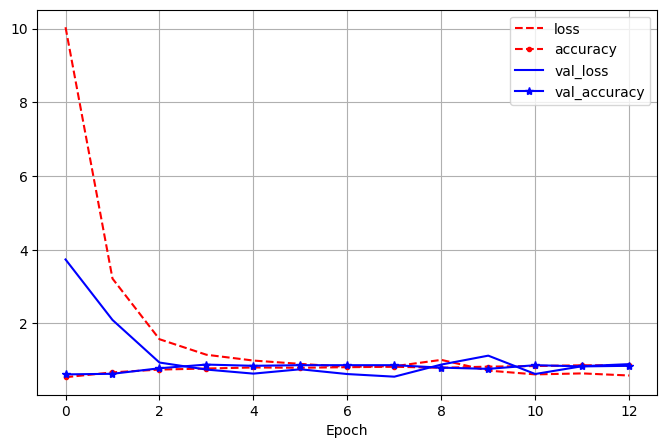

In [18]:
pd.DataFrame(vgg_history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [19]:
model_vgg.evaluate(X_test_pre, verbose = 1)

10/10 [==============================] - 1s 91ms/step - loss: 0.3337 - accuracy: 0.9200


[0.333662211894989, 0.9200000166893005]

In [20]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# report accuracy on the test set
y_proba = model_vgg.predict(X_test)
y_pred = y_proba.argmax(axis=-1)

accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(y_test, y_pred)
print('Accuracy on the test set is', accuracy.result().numpy())

# report precision on the test set
precision = precision_score(y_test, y_pred, average='macro')
print('Precision on the test set is', precision)

# report recall on the test set
recall = recall_score(y_test, y_pred, average='macro')
print('Recall on the test set is', recall)

# report f1-score on the test set
recall = f1_score(y_test, y_pred, average='macro')
print('F1-score on the test set is', recall)

# report the precision and recall values by class_id on the test set
print('The precision and recall values by class_id on the test set:')
print(classification_report(y_test, y_pred))

Accuracy on the test set is 0.92
Precision on the test set is 0.9279100529100529
Recall on the test set is 0.9253246753246752
F1-score on the test set is 0.9246757962444238
The precision and recall values by class_id on the test set:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.89      1.00      0.94         8
           2       1.00      0.93      0.96        14
           3       1.00      0.91      0.95        11
           4       0.93      0.93      0.93        14
           5       0.75      0.86      0.80        14

    accuracy                           0.92        75
   macro avg       0.93      0.93      0.92        75
weighted avg       0.93      0.92      0.92        75

